# Happymonk Monk AI - Programming Test 
### Name: Chetan Yeola
### Email: yeola41@gmail.com

## Loading Bank Note Authentication data from datasets

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from scipy.special import softmax
from sklearn.metrics import classification_report, confusion_matrix
data = pd.read_csv("BankNote_Authentication.csv")
#data

# data = data.drop
data = data.sample(frac=1)
train = data[:1200]
test = data[1200:]
train

,variance,skewness,curtosis,entropy,class
641,0.94225,5.85610,1.87620,-0.32544,0
1105,-1.67060,-2.09000,1.58400,0.71162,1
754,2.39690,0.23589,4.84770,1.43700,0
61,0.49665,5.52700,1.77850,-0.47156,0
352,0.32920,-4.45520,4.57180,-0.98880,0
...,...,...,...,...,...
1098,-1.80460,-6.81410,6.70190,1.16810,1
787,-2.66850,-10.45190,9.11390,-1.73230,1
440,3.43590,0.66216,2.10410,1.89220,0
185,-1.25370,10.88030,1.93100,-4.32370,0


In [2]:
test

,variance,skewness,curtosis,entropy,class
59,-0.78289,11.36030,-0.37644,-7.04950,0
1361,-1.57320,1.06360,-0.71232,-0.83880,1
973,1.23090,3.89230,-4.82770,-4.00690,1
96,2.95430,1.07600,0.64577,0.89394,0
918,2.39170,4.55650,-4.98880,-2.89870,1
...,...,...,...,...,...
151,-1.75990,11.92110,2.67560,-3.32410,0
1269,-2.12410,-6.89690,5.59920,-0.47156,1
1127,-2.36290,-0.10554,1.93360,1.13580,1
279,1.92650,7.75570,-0.16823,-3.07710,0


In [3]:
X_test = []
Y_test = []
columns = test.columns
for i, row in test.iterrows():
    dataset = []
    for column in columns:
        if column == "class":
            Y_test.append(row[column])
        else:
            dataset.append(row[column])
    X_test.append(dataset)
    
X_test = np.array(X_test)
X_test = X_test.transpose()
Y_test = np.array(Y_test)

In [4]:
X_train = []
Y_train = []
columns = train.columns
for i, row in train.iterrows():
    dataset = []
    for column in columns:
        if column == "class":
            Y_train.append(row[column])
        else:
            dataset.append(row[column])
    X_train.append(dataset)
    
X_train = np.array(X_train)
X_train = X_train.transpose()
Y_train = np.array(Y_train)

In [5]:
X_test.shape

(4, 172)

In [6]:
X_train.shape

(4, 1200)

In [7]:
print (Y_test.shape)
Y_test = Y_test.reshape((172, 1))
Y_test.shape

(172,)


(172, 1)

In [8]:
print (Y_train.shape)
Y_train = Y_train.reshape((1200, 1))
Y_train.shape

(1200,)


(1200, 1)

In [9]:
enc = OneHotEncoder(handle_unknown='ignore')
Y_enc_train = enc.fit_transform(Y_train)
Y_enc_test = enc.transform(Y_test)

In [10]:
Y_enc_train = Y_enc_train.toarray()
Y_enc_test = Y_enc_test.toarray()

In [11]:
Y_enc_train = Y_enc_train.transpose()
Y_enc_test = Y_enc_test.transpose()

In [12]:
print (Y_enc_train.shape)
print (Y_enc_test.shape)

(2, 1200)
(2, 172)


In [13]:
Y_test = Y_enc_test
Y_train = Y_enc_train

In [14]:
Y_test.shape

(2, 172)

In [15]:
Y_train.shape

(2, 1200)

In [16]:
X_test.shape

(4, 172)

In [18]:
X_train.shape

(4, 1200)

In [19]:
mean = np.mean(X_train, axis = 1)

In [20]:
mean = mean.reshape((4,1))
mean

array([[ 0.38194692],
       [ 1.96427379],
       [ 1.41144174],
       [-1.23040086]])

In [21]:
X_train = X_train/mean
X_train.shape

(4, 1200)

In [22]:
X_train

array([[ 2.4669658 , -4.37390615,  6.27547925, ...,  8.9957525 ,
        -3.28239323, -7.90502504],
       [ 2.98130537, -1.06400646,  0.12009018, ...,  0.33710168,
         5.53909544,  0.90491458],
       [ 1.3292791 ,  1.12225674,  3.43457322, ...,  1.4907452 ,
         1.36810465,  0.52247994],
       [ 0.26449917, -0.57836436, -1.16791206, ..., -1.53787279,
         3.51405802,  0.36854656]])

In [23]:
X_test = X_test/mean
X_test.shape

(4, 172)

In [24]:
X_test

array([[-2.04973506e+00, -4.11889689e+00,  3.22269908e+00,
         7.73484432e+00,  6.26186480e+00, -3.32245116e-01,
         3.50912631e+00,  8.23465199e+00,  1.06593344e+01,
         1.98289331e+00, -2.63125564e+00, -1.88685902e+00,
         1.55450918e+01,  7.01641990e+00,  2.99256239e+00,
        -1.84737710e+00, -6.91352602e+00,  7.83878547e+00,
        -2.81295628e+00,  1.26384052e+01,  1.13602171e+00,
         1.46381595e+01,  1.38927680e+01, -1.03663618e+01,
         1.02008938e+01,  1.04710884e+01,  1.03056204e+01,
         1.31392601e+01,  4.31264109e+00,  2.29359093e+00,
         1.14371912e+01,  8.62004585e-01,  1.09863432e+01,
         4.05239551e+00,  9.95504809e+00, -7.58141987e+00,
         1.59003768e+00, -4.46737463e+00, -6.49592873e-01,
         2.43410783e+00, -3.72643399e+00,  8.25795366e+00,
        -1.14327403e+01,  6.05738613e+00,  2.31178717e+00,
         1.02794387e+01, -2.88129038e+00,  8.48861398e+00,
         8.39148006e+00,  4.92188804e+00, -9.37329187e+0

In [26]:
X_test.shape

(4, 172)

In [33]:
def activation(Z, K):
    return (K[0] + K[1]*Z)


def forward_propagation(X, params):
    W1 = params["W1"]
    B1 = params["B1"]
    W2 = params["W2"]
    B2 = params["B2"]
    K = params["K"]
    
    cache = {}
    
    print ("W1 shape: ", W1.shape)
    print ("B1 shape: ", B1.shape)
    
    Z1 = np.dot(W1, X) + B1
    print ("Z1 shape: ", Z1.shape)
    
    A1 = activation(Z1, K)
    print ("A1 shape: ", A1.shape)
    
    cache["Z1"] = Z1
    cache["A1"] = A1

    print ("W2 shape: ", W2.shape)
    print ("B2 shape: ", B2.shape)
    
    Z2 = np.dot(W2, A1) + B2
    print ("Z2 shape: ", Z2.shape)
    
    A2 = softmax(Z2, axis=0)
    print ("A2 shape: ", A2.shape)
    
    cache["Z2"] = Z2
    cache["A2"] = A2

    return cache, A2


def initialize_network(hidden_units_list):
    params = {}
    for i in range(len(hidden_units_list)-1):
        params["W"+str(i+1)] = np.random.randn(hidden_units_list[i+1], hidden_units_list[i])
        params["B"+str(i+1)] = np.random.randn(hidden_units_list[i+1], 1)

    params["K"] = np.random.rand(2)
    return params


def loss(Y_hat, Y):
    N = Y.shape[1]
    ce = -np.sum(np.multiply(Y, np.log(Y_hat))) / N
    return ce


def back_propagation(cache, params, X, Y, Y_hat):
    A1 = cache["A1"]
    Z1 = cache["Z1"]
    W2 = params["W2"]
    B2 = params["B2"]
    B1 = params["B1"]
    K = params["K"]
    m = X.shape[1]
    
    dZ2 = Y_hat - Y
    print  ("dZ2.shape: ", dZ2.shape)
    
    dW2 = np.dot(dZ2, (1/m)*A1.transpose())
    print ("dW2 shape: ", dW2.shape)
    
    dB2 = np.mean(dZ2, axis = 1)
    dB2 = dB2.reshape(B2.shape)
    print ("dB2 shape: ", dB2.shape)
    
    dA1 = np.dot(W2.transpose(), dZ2)
    print ("dA1 shape: ", dA1.shape)
    
    dZ1 = K[1]*dA1
    dW1 = np.dot(dZ1, (1/m)*X.transpose())
    print ("dW1 shape: ", dW1.shape)
    
    dB1 = np.mean(dZ1, axis = 1)
    dB1 = dB1.reshape(B1.shape)
    print ("dB1 shape: ", dB1.shape)
    
    dK = [np.mean(dA1)]
    dK.append(np.mean(np.multiply(dA1, Z1)))
    dK = np.array(dK)
    
    gradients = {}
    gradients["dW1"] = dW1
    gradients["dB1"] = dB1
    gradients["dW2"] = dW2
    gradients["dB2"] = dB2
    gradients["dK"] = dK
    
    return gradients



def test(X_test, Y_test, params):
    cache, A2 = forward_propagation(X_test, params)
    
    y_pred = np.argmax(A2, axis=0)
    y_pred = y_pred.tolist()
    print ("PRED: ", y_pred)
    
    y_test = np.argmax(Y_test, axis=0)
    y_test = y_test.tolist()
    
    print (confusion_matrix(y_pred, y_test))
    print (classification_report(y_pred, y_test))    


    
def update_params(alpha, gradients, params):
    W1 = params["W1"]
    W2 = params["W2"]
    B1 = params["B1"]
    B2 = params["B2"]
    K = params["K"]
    
    dW1 = gradients["dW1"]
    dW2 = gradients["dW2"]
    dB1 = gradients["dB1"]
    dB2 = gradients["dB2"]
    dK = gradients["dK"]
    
    params["W1"] = W1-(alpha*(dW1))
    params["W2"] = W2-(alpha*(dW2))
    
    params["B1"] = B1-(alpha*(dB1))
    params["B2"] = B2-(alpha*(dB2))
    
    params["K"] = K-(alpha*(dK))
    return params
    

def train(X, Y, params, alpha, epoch):
    params_info = {
        "initial_settings": params
    }
    losses = []
    for j in range(epoch):
        cache, Y_hat = forward_propagation(X, params)
        gradients = back_propagation(cache, params, X, Y, Y_hat)
        params = update_params(alpha, gradients, params)
    
        s = loss(Y_hat, Y)
        print ("EPOCH: ", j+1, "  LOSS: ", s)
        params_info[j+1] = params
        losses.append(s)
        print ("\n\n\n------------------------------------------------------------------------\n\n\n")
        
    return losses, params, params_info

Since we are supposed to make only 3-layered NN (1 input layer, 1 hidden layer and 1 output layer). Thus
the list hidden_units_layer tells the number of neurons in each layer. The number of neurons in the hidden 
layer is a haperparameter , thus can be changed and experimented on. Number of Input newrons and output layer 
neurons remains fixed.

In [34]:
hidden_units_layer = [4,3,2]
print ("X_train shape: ", X_train.shape)
print ("Y_train shape: ", Y_train.shape)
params = initialize_network(hidden_units_layer)
alpha = 0.01  # hyperparameter, can be changed and experimented on
epoch= 1000   # hyperparameter, can be changed and experimented on
losses, params, params_info = train(X_train, Y_train, params, alpha, epoch)

X_train shape:  (4, 1200)
Y_train shape:  (2, 1200)
W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  1   LOSS:  3.6081631729670773



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  2   LOSS:  3.1225825705756383



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.sh

Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  40   LOSS:  0.44563452765326833



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  41   LOSS:  0.4403116700008379



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  42   LOSS:  0.43529575744631493



------

dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  62   LOSS:  0.3683934070707854



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  63   LOSS:  0.3659290737830981



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  64   LOSS:  0.36351057708093726



-----------------------------------------------------------------------

dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  103   LOSS:  0.2896863018982223



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  104   LOSS:  0.2881204607861792



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  105   LOSS:  0.28656580102217205



----------------------------------------------

B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  141   LOSS:  0.23677246234187707



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  142   LOSS:  0.23553567122384048



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:

Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  174   LOSS:  0.19937221352481369



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  175   LOSS:  0.1983418536270799



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  176   LOSS:  0.19731720245836948



---

EPOCH:  211   LOSS:  0.164887453584608



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  212   LOSS:  0.16405482604107394



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  213   LOSS:  0.16322720283801628



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (

dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  252   LOSS:  0.13466491013593



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  253   LOSS:  0.13402265780984746



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  254   LOSS:  0.13338463572109585



---------------------------------------------------------------------

Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  288   LOSS:  0.11405003546619819



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  289   LOSS:  0.11354594251471536



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  290   LOSS:  0.11304526343453387



--

EPOCH:  315   LOSS:  0.10157209959014739



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  316   LOSS:  0.10115236654571069



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  317   LOSS:  0.10073545788819392



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape: 

EPOCH:  350   LOSS:  0.08843542765855637



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  351   LOSS:  0.08810328096078117



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  352   LOSS:  0.087773323516908



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (

A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  389   LOSS:  0.07696919470277291



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  390   LOSS:  0.0767117765619372



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape

Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  425   LOSS:  0.06866722637416381



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  426   LOSS:  0.06846266818484006



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  427   LOSS:  0.06825939615807267



--

B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  447   LOSS:  0.06445067160226631



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  448   LOSS:  0.06427242849009308



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  449   LOSS:  0.06409

Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  468   LOSS:  0.06092914597053614



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  469   LOSS:  0.06077250511206211



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  470   LOSS:  0.06061681560921902



--

A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  509   LOSS:  0.05522038654693752



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  510   LOSS:  0.05509774803505875



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  511   LOSS:  0.05497582235203545



-----------------------

Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  530   LOSS:  0.052788223831461124



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  531   LOSS:  0.052679549625811437



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 

Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  551   LOSS:  0.05062964470371433



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  552   LOSS:  0.05053301868998194



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  553   LOSS:  0.050436923365475686



-

dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  573   LOSS:  0.04862096121878377



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  574   LOSS:  0.048535196670408745



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  575   LOSS:  0.04844988744584245



-----------------------------------------------------------------

B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  596   LOSS:  0.046758207830416045



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  597   LOSS:  0.04668216033683066



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape

Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  635   LOSS:  0.044057694203284495



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  636   LOSS:  0.043995011737231596



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 

A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  675   LOSS:  0.04176526857975169



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  676   LOSS:  0.04171313673180657



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shap

Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  696   LOSS:  0.04071700871230822



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  697   LOSS:  0.040669422948483934



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 s

Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  736   LOSS:  0.03895954411231215



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  737   LOSS:  0.03891914652771878



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  738   LOSS:  0.03887890746243123



--

B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  778   LOSS:  0.037389356318408326



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  779   LOSS:  0.03735488683366928



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  780   LOSS:  0.0373

EPOCH:  819   LOSS:  0.03607143432776172



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  820   LOSS:  0.03604155796936523



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  821   LOSS:  0.03601178156814826



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape: 

dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  840   LOSS:  0.03546435037838358



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  841   LOSS:  0.03543646837686599



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  842   LOSS:  0.03540867610798788



------------------------------------------------------------------

Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  881   LOSS:  0.034390232582768354



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  882   LOSS:  0.034365688253949145



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  883   LOSS:  0.03434121732506939





EPOCH:  921   LOSS:  0.03346246797303827



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  922   LOSS:  0.03344060878261118



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  923   LOSS:  0.033418810644836254



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:

dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  959   LOSS:  0.03267255965681313



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  960   LOSS:  0.03265284222755474



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  961   LOSS:  0.03263317656868343



------------------------------------------------------------------

EPOCH:  999   LOSS:  0.031922199758102864



------------------------------------------------------------------------



W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
dZ2.shape:  (2, 1200)
dW2 shape:  (2, 3)
dB2 shape:  (2, 1)
dA1 shape:  (3, 1200)
dW1 shape:  (3, 4)
dB1 shape:  (3, 1)
EPOCH:  1000   LOSS:  0.031904394783381494



------------------------------------------------------------------------





In [35]:
test(X_test, Y_test, params)

W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 172)
A1 shape:  (3, 172)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 172)
A2 shape:  (2, 172)
PRED:  [0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0]
[[94  2]
 [ 2 74]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        96
           1       0.97      0.97      0.97        76

    accuracy                           0.98       172
   macro avg       0.98      0.98      0.98       172
weighted avg       0.98      0.98

In [36]:
test(X_train, Y_train, params)

W1 shape:  (3, 4)
B1 shape:  (3, 1)
Z1 shape:  (3, 1200)
A1 shape:  (3, 1200)
W2 shape:  (2, 3)
B2 shape:  (2, 1)
Z2 shape:  (2, 1200)
A2 shape:  (2, 1200)
PRED:  [0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,

## Plotting the Epoch vs loss Graph

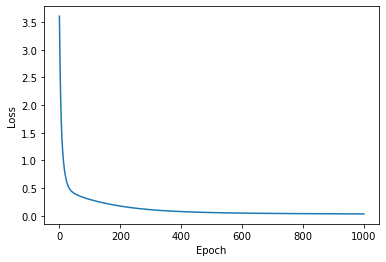

In [37]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()